# -----------------------------------------------------------------(2)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('u.data')

In [4]:
df.head(n=5)
# it is a tsv file and not a csv file. so to convert it into csv we will use sep='\t'

,196\t242\t3\t881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


In [5]:
df=pd.read_csv('u.data',sep='\t')

In [6]:
df.head(n=5)
# it does not have any name for columns. so we should give them name.

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [7]:
columns=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=columns)

In [8]:
df.head(n=10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [9]:
df.shape

(100000, 4)

In [10]:
print(df['user_id'].nunique())
print(df['item_id'].nunique())
print(df['rating'].nunique())
print(df['timestamp'].nunique())
# it returns the unique value in each column.

943
1682
5
49282


In [11]:
movie_titles=pd.read_csv('u.item',sep='\|',header=None)

In [12]:
movie_titles.head(n=5)
# this file has so many useless columns and we only needs first two columns that are item_id and movie title.

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
movie_titles=movie_titles.values
# converting pandas dataframe into numpy array

In [14]:
movie_titles=movie_titles[:,0:2]
# extracting first two columns

In [15]:
movie_titles=pd.DataFrame(movie_titles)
# converting back into dataframe

In [16]:
movie_titles.columns=['item_id','movie_title']

In [26]:
movie_titles

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [18]:
movie_titles.shape

(1682, 2)

In [20]:
print(movie_titles['item_id'].nunique())
print(movie_titles['movie_title'].nunique())
# it means that there are some movies which has more than one item_id
# and it should be 18 (ie, 1682-1664=18)
#let's check it.

1682
1664


In [32]:
duplicate = movie_titles[movie_titles.duplicated('movie_title')] 
duplicate.shape
# yes it is same, ie 18 movies are repeating.

(18, 2)

In [33]:
duplicate
# these are the movies which are repeating

,item_id,movie_title
267,268,Chasing Amy (1997)
302,303,Ulee's Gold (1997)
347,348,Desperate Measures (1998)
499,500,Fly Away Home (1996)
669,670,Body Snatchers (1993)
679,680,Kull the Conqueror (1997)
864,865,"Ice Storm, The (1997)"
880,881,Money Talks (1997)
1002,1003,That Darn Cat! (1997)
1256,1257,"Designated Mourner, The (1997)"


In [38]:
movie_titles[movie_titles['movie_title']=='Sliding Doors (1998)']
# just checking for one repeated movie that how actually it is present in dataframe.

,item_id,movie_title
1428,1429,Sliding Doors (1998)
1679,1680,Sliding Doors (1998)


In [39]:
print(df.shape)
print(movie_titles.shape)

(100000, 4)
(1682, 2)


#### Now we have two dataframes and there is one columns (i.e., item_id) which is common in both the dataframes. So, now we can merge these two dataframes on the basis of that column.

In [40]:
df=pd.merge(df,movie_titles,on='item_id')

In [41]:
df.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [42]:
df.shape

(100000, 5)

# -----------------------------------------------------------------(3)

In [43]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'movie_title'], dtype='object')

In [45]:
df.groupby('movie_title').mean()['rating'].sort_values(ascending=False)
# it will take one particular movie and then it will take all its ratings and then finds out its mean.

movie_title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

#### as there can be a chance that a movie can only be viewed by only one single person and he can give 5 rating to it. Now the movie has 5 rating but it is only viewed by one person.
#### On other hand, it can be possible that a movie is viewd by so many persons and because of mixed ratings now the movie has some 2 or 3 rating.
#### So to avoid this, we should also take care of count of movie ratings which arranging the rating is descending order.

In [46]:
df.groupby('movie_title').count()['rating'].sort_values(ascending=False)
# it will count the number of ratings for particular movie.

movie_title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [52]:
ratings=pd.DataFrame(df.groupby('movie_title').mean()['rating'])
ratings
# here ratings dataframe only has movie title and its mean rating.

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [53]:
ratings['num_of_ratings']=pd.DataFrame(df.groupby('movie_title').count()['rating'])
ratings
# now we have added num_of_ratings also in our ratings dataframe.

,rating,num_of_ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [54]:
ratings.sort_values(by=['num_of_ratings'],ascending=False)
# now this is how our ratings dataframe is looking.

,rating,num_of_ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [65]:
ratings[ratings['num_of_ratings']<10]
# those movies which are watched less than 10 times.

,rating,num_of_ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5
8 Heads in a Duffel Bag (1997),3.250000,4
8 Seconds (1994),3.750000,4
...,...,...
Year of the Horse (1997),3.285714,7
You So Crazy (1994),3.000000,1
Zeus and Roxanne (1997),2.166667,6


In [55]:
plt.style.use('seaborn')

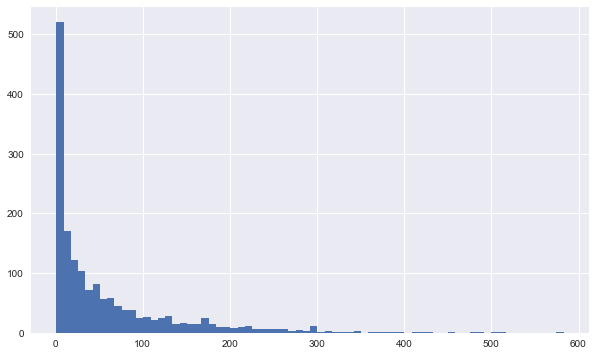

In [66]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num_of_ratings'],bins=70)
plt.show()
# it is basically showing:
# X-axis --> num of rating ie, how many times a movie is watched.
# Y-axis --> frequency of those numbers.
# eg, lets suppose we wants to find out those movies which are watched between 1 and 10 times.

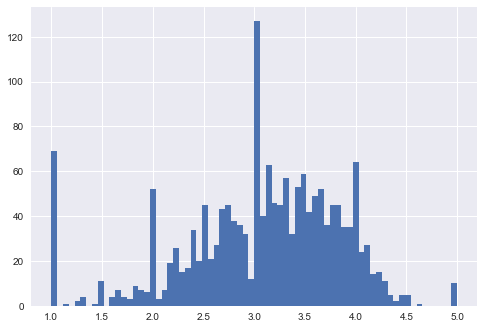

In [67]:
plt.hist(ratings['rating'],bins=70)
plt.show()
# if we don't specify then it automatically takes frequency on y-axis.

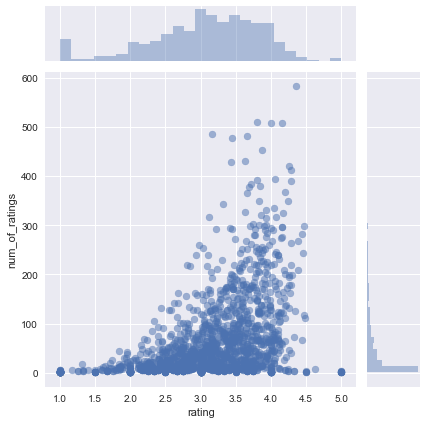

In [68]:
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha=0.5)

# -----------------------------------------------------------------(4)

In [70]:
moviemat=df.pivot_table(index='user_id',columns='movie_title',values='rating')
moviemat.shape
# a matrix which has rating values of specific user for specific movie.

(943, 1664)

In [71]:
moviemat.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [72]:
starwars_user_ratings=moviemat['Star Wars (1977)']
starwars_user_ratings
# picking only the star wars movie column

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [78]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)
print(similar_to_starwars.shape,end='\n\n\n')
print(similar_to_starwars)
# Q:- what is it doing??
# ans:- it is taking all ratings of Star Wars movie(ie entire column of star wars) and then it is correlating
# it with all rest of the columns(ie rest of the movies).

(1664,)


movie_title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64


In [79]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_starwars
# it has correlation value of star wars with rest of the movies.

,correlation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [85]:
corr_starwars.dropna(inplace=True)
corr_starwars.shape
# to drop those rows which has NaN valuse.

(1410, 1)

In [86]:
corr_starwars=corr_starwars.join(ratings['num_of_ratings'])
corr_starwars
# now we have added num_of ratings also in our dataframe.

,correlation,num_of_ratings
movie_title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [88]:
corr_starwars[corr_starwars['num_of_ratings']>100].sort_values(by=['correlation'],ascending=False)
# it will give those movie names which has num_of_ratings > 100 

,correlation,num_of_ratings
movie_title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [90]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['num_of_ratings'])
    predictions=corr_movie[corr_movie['num_of_ratings']>100].sort_values('correlation',ascending=True)
    
    return predictions

In [91]:
predictions=predict_movies("Titanic (1997)")
predictions

,correlation,num_of_ratings
movie_title,,
James and the Giant Peach (1996),-0.370248,126
Cold Comfort Farm (1995),-0.307150,125
Brazil (1985),-0.243532,208
Jackie Brown (1997),-0.236841,126
Raging Bull (1980),-0.223660,116
...,...,...
True Lies (1994),0.435104,208
Bram Stoker's Dracula (1992),0.443560,120
"Abyss, The (1989)",0.472103,151
